### 필요한 모듈 임포트

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

데이터 셋 준비및 수치형,범주형,타겟 데이터 정의

In [4]:
df = pd.read_csv('content/xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


* 수치형 데이터: raisedhands, VisITedResources, AnnouncementsView, Discussion
* 범주형 데이터: gender, NationalITy, PlaceofBirth, StageID, GradeID, SectionID, Topic, Semester, Relation, ParentAnsweringSurvey, ParentschoolSatisfaction, StudentAbsenceDays
* 타겟 데이터: Class

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

### 1. 학생 성별 분포

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29608\3020103060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'], palette='pastel')


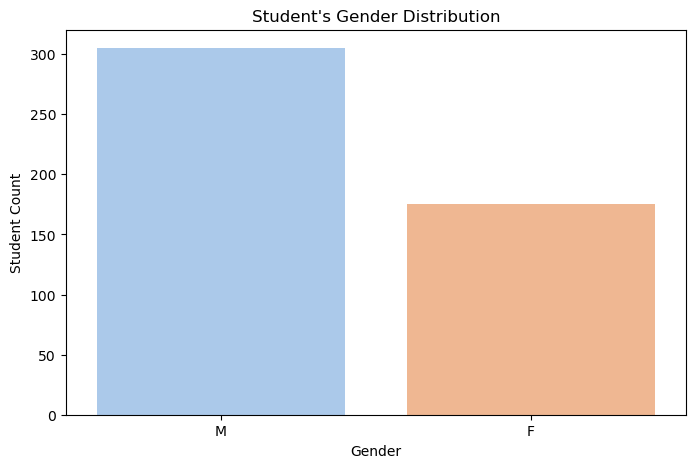

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['gender'], palette='pastel')
plt.title("Student's Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Student Count")
plt.show()

* 여학생보다 남학생의 수가 더 많다.

### 2. 학생 국적 분포

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29608\1280284744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['NationalITy'], palette='viridis', order=df['NationalITy'].value_counts().index)


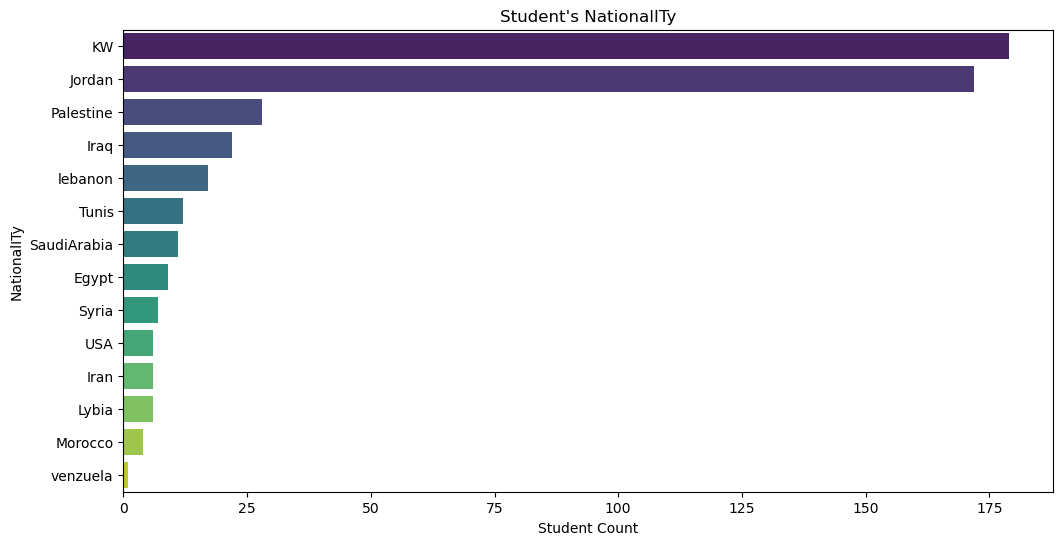

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['NationalITy'], palette='viridis', order=df['NationalITy'].value_counts().index)
plt.title("Student's NationalITy")
plt.xlabel("Student Count")
plt.ylabel("NationalITy")
plt.show()

* 대부분의 학생들은 쿠웨이트와 요르단 국적이다.

### 3. 학년(StageID) 분포

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29608\2414966448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['StageID'], palette='muted')


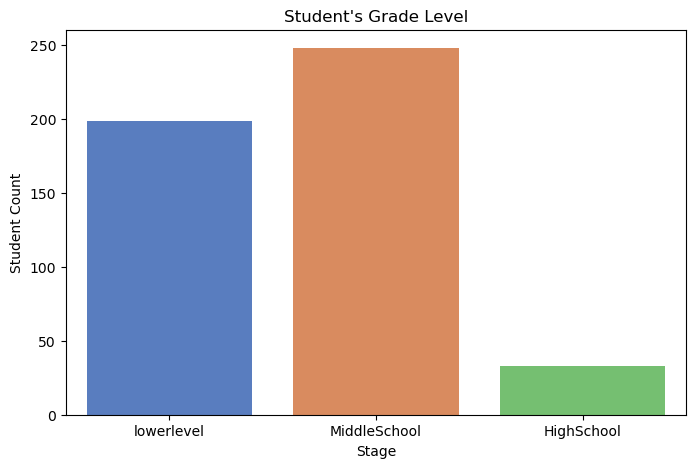

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['StageID'], palette='muted')
plt.title("Student's Grade Level")
plt.xlabel("Stage")
plt.ylabel("Student Count")
plt.show()

* lowerlevel과 MiddieSchool이 많은 비중을 차지하고 있고 highschool에는 적은 학생수로 분포되있다.

### 4. 과목별 학생 수

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29608\4100684295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Topic'], palette='coolwarm', order=df['Topic'].value_counts().index)


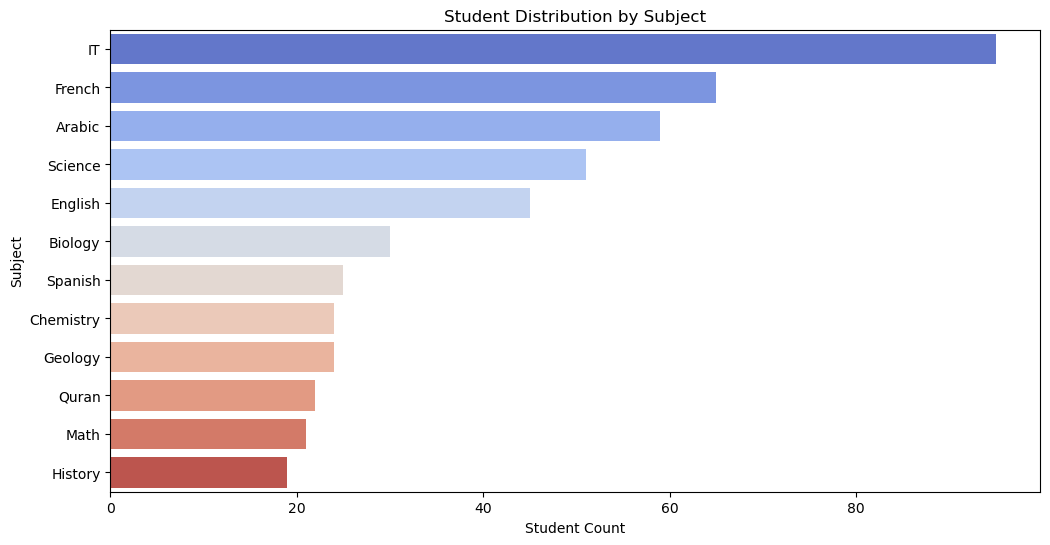

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Topic'], palette='coolwarm', order=df['Topic'].value_counts().index)
plt.title("Student Distribution by Subject")
plt.xlabel("Student Count")
plt.ylabel("Subject")
plt.show()

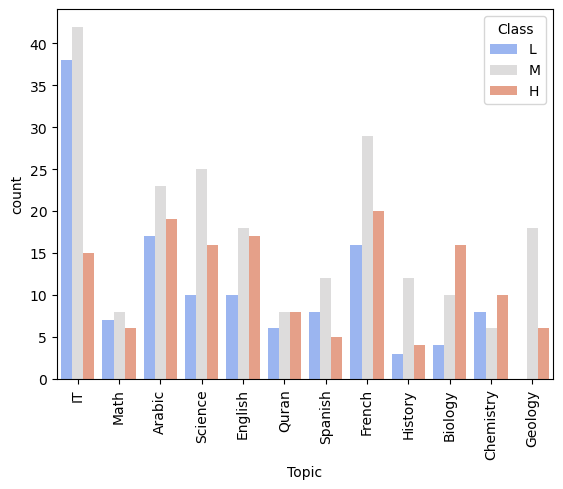

In [10]:
sns.countplot(x='Topic', data=df, hue='Class', palette='coolwarm', hue_order=['L', 'M', 'H'])
plt.xticks(rotation=90)
plt.show()

IT과목은 다른 과목들에 비해 성적 등급을 받기 어려운것으로 보인다.
생물학 과목을 수강한 학생들은 성적이 높은편이다.

In [11]:
# 범주형 데이터인 타겟 컬럼을 수치로 바꾸어 표현
# L: -1, M: 0, H:1
df['Class_value'] = df['Class'].map({'L': -1, 'M': 0, 'H': 1})
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


### 5. 결석 횟수와 성적의 관계

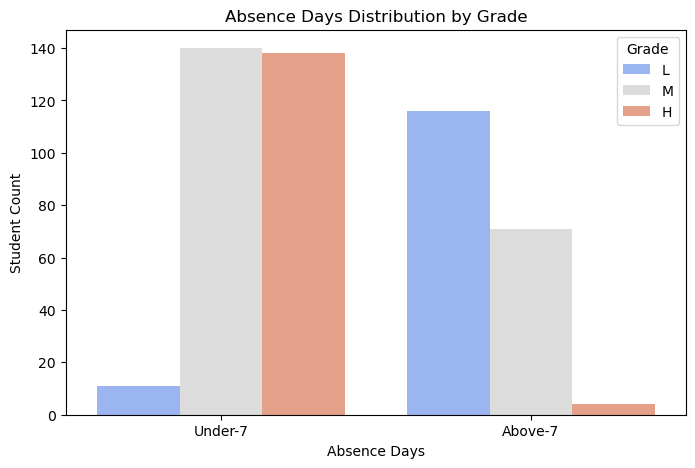

In [61]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["StudentAbsenceDays"], hue=df["Class"], palette="coolwarm", hue_order=["L", "M", "H"])
plt.title("Absence Days Distribution by Grade")
plt.xlabel("Absence Days")
plt.ylabel("Student Count")
plt.legend(title="Grade")
plt.show()

* 결석이 7회 미만(Under-7)인 경우, 높은 성적(H)과 보통 성적(M)을 받은 학생들이 많으며, 낮은 성적(L)을 받은 학생은 거의 없다.
* 결석이 7회 이상(Above-7)인 경우, 낮은 성적(L)을 받은 학생이 압도적으로 많고, 높은 성적(H)을 받은 학생은 거의 없다.

- 즉 결석횟수가 증가할수록 성적이 낮아지는 경향이 뚜렷하다.
 -> 출석을 잘하는 학생들이 높은 성적을 받을 가능성이 크다.

### 6. 성적에 따른 손을 든 횟수

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17372\2281953725.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Class'], y=df['raisedhands'], palette='coolwarm', order=['L', 'M', 'H'])


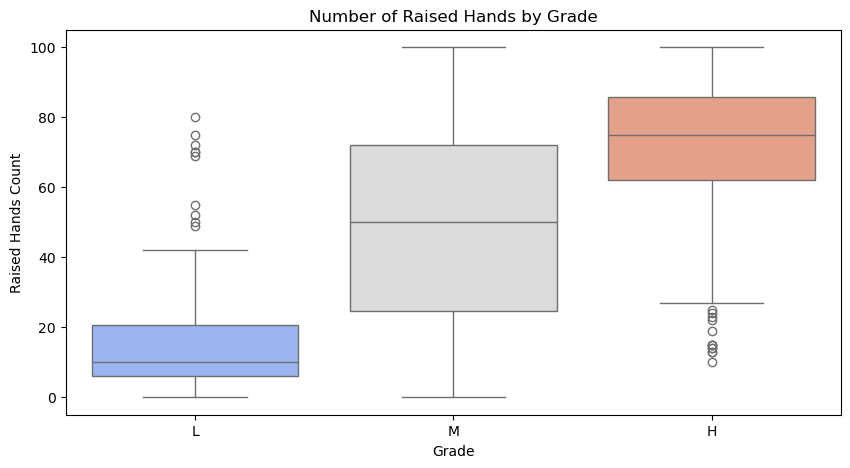

In [56]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Class'], y=df['raisedhands'], palette='coolwarm', order=['L', 'M', 'H'])
plt.title("Number of Raised Hands by Grade")
plt.xlabel("Grade")
plt.ylabel("Raised Hands Count")
plt.show()

1. 높은 성적(H) 그룹: 손을 든 횟수가 많고, 전체적으로 높은 분포를 보임
2. 보통 성적(M) 그룹: 손을 든 횟수가 중간 정도의 값을 보이며, 편차가 있음.

 즉, 손을 자주 드는 학생일수록 성적이 높을 가능성이 크다는 인사이트 도출

### 7. 성적에 따른 학습 자료 확인 횟수

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17372\1049629123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Class'], y=df['VisITedResources'], palette='coolwarm' , order=['L', 'M', 'H'])


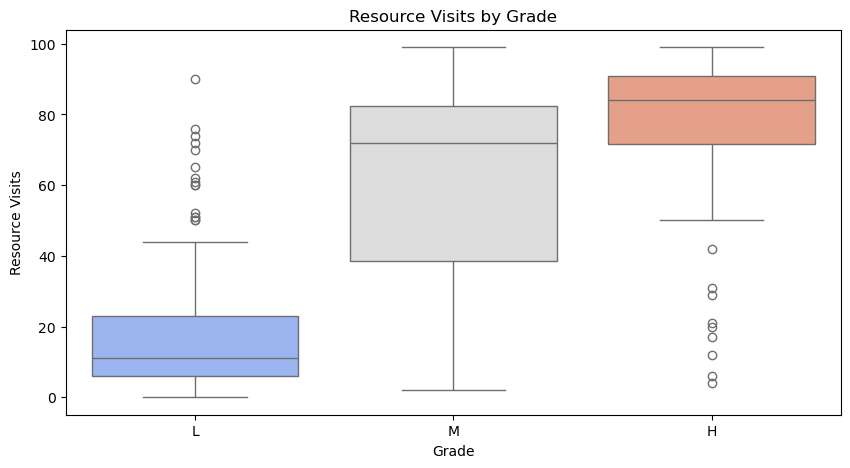

In [66]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Class'], y=df['VisITedResources'], palette='coolwarm' , order=['L', 'M', 'H'])
plt.title("Resource Visits by Grade")
plt.xlabel("Grade")
plt.ylabel("Resource Visits")
plt.show()

1. 높은 성적(H) 그룹: 학습 자료 확인 횟수가 많으며, 중앙값이 높다.
2. 보통 성적(M) 그룹: 손을 든 횟수가 중간 정도의 값을 보이며, 편차가 있음.
3. 낮은 성적(L) 그룹: 손을 든 횟수가 전반적으로 낮으며, 최댓값도 비교적 낮다.
* 즉, 손을 자주 드는 학생일수록 성적이 높을 가능성이 크다는 인사이트를 얻을 수 있다.

### 8. 부모가 학교 설문에 참여했는지 여부

<Axes: xlabel='ParentschoolSatisfaction', ylabel='count'>

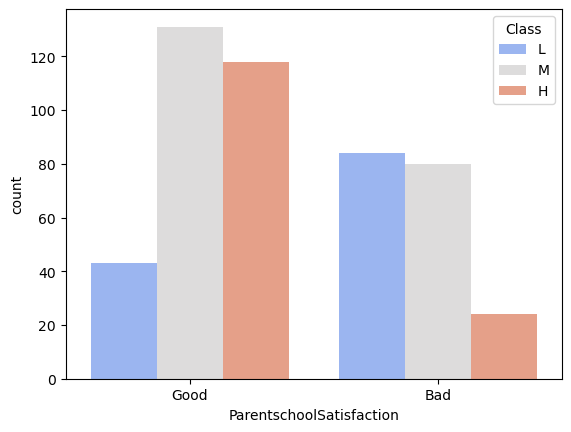

In [68]:
sns.countplot(x='ParentschoolSatisfaction', data=df, hue='Class',palette='coolwarm',  hue_order=['L', 'M', 'H'])

- 부모가 학교에 만족한 학생이 그렇지 않은 학생보다 성적 등급이 더 높다.
- 하지만 자녀의 성적이 좋기 때문에 부모가 학교에 만족한 것일 수도 있다.
* 설문 조사가 진행된 시기가 성적이 나오기 전/후인지 알 수 없기 때문에 **분석에서 제외하는 것**이 좋다.

### 8. 변수 간 상관관계 분석

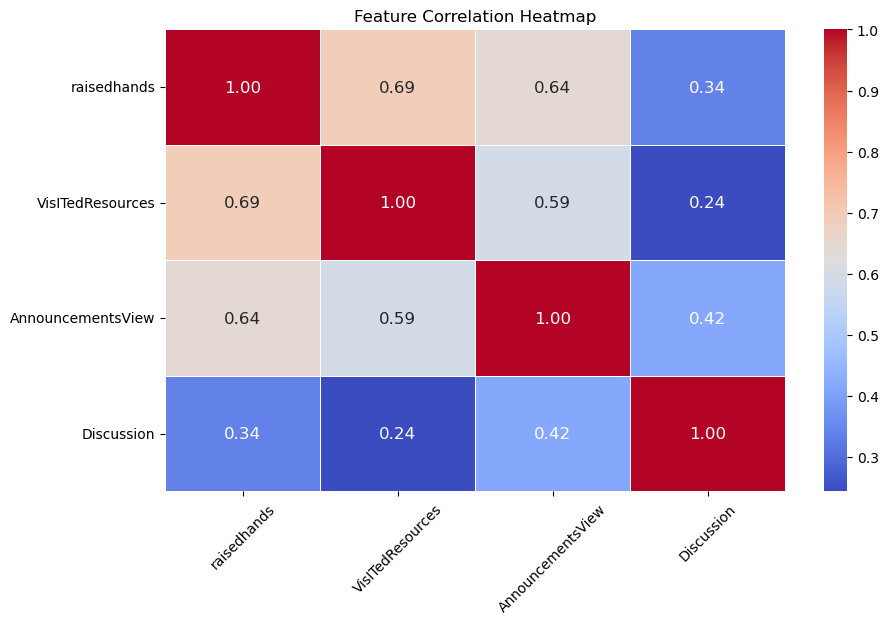

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 12})
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45)  # X축 라벨 회전
plt.yticks(rotation=0)   # Y축 라벨 고정
plt.show()

raisedhands ↔ VisITedResources (0.69)

- 학생이 수업 중 손을 많이 들수록 온라인 리소스를 자주 확인하는 경향이 있음.

raisedhands ↔ AnnouncementsView (0.64)

- 수업 중 손을 많이 드는 학생일수록 공지사항도 자주 확인하는 경향이 있음.
교사의 공지를 잘 챙겨보는 학생들이 수업에서도 적극적인 태도를 보일 가능성이 높음.

Discussion ↔ 다른 변수들의 상관관계가 상대적으로 낮음 (~0.34 이하)

- 수업 중 토론(Discussion) 참여는 다른 활동(raisedhands, VisITedResources)과 비교적 낮은 상관관계를 가짐.
일부 학생들은 토론보다는 개별 학습에 집중하는 경향이 있을 수 있음.